In [6]:
!pip install -r requirements.txt

In [7]:
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")

In [8]:
# inspired by https://stackoverflow.com/questions/18603270/progress-indicator-during-pandas-operations
# nicely prints progress of lengthy pandas calculation in jupyter notebook
from tqdm.auto import tqdm 
tqdm.pandas()

In [9]:
from settings import SimulationSetup
from helper import rdd_dose_Gy
from printing import pretty_print

In [10]:
# create an array of values to be used for horizontal axis of RDD vs radius plot
# this is distance from ion track in meters

points_per_decade = 4
start_at_exponent=-11
stop_at_exponent=-7

no_of_decades = stop_at_exponent-start_at_exponent
no_of_samples = no_of_decades * points_per_decade + 1

r_m = np.logspace(start=start_at_exponent, stop=stop_at_exponent, num=no_of_samples)

In [11]:
simulation_setup = SimulationSetup()

simulation_setup.beam.particle_name = "12C"
#simulation_setup.material.material_name = "Water, Liquid"

# we will calculate RDD just for a single energy value
simulation_setup.beam.start_E_MeV_u = 10.
simulation_setup.beam.stop_E_MeV_u = simulation_setup.beam.start_E_MeV_u
simulation_setup.beam.num_E_MeV_u = 1

# some of the options in simulation setup are not needed for RDD calculation,
# instead of leaving default values, we set those items to `nan` (not-a-number) or to `None`

# just a single value of a0 parameter, note that final `,` is needed in python to define a single-element tuple
simulation_setup.tst_model.a0_nm = (5,)

# model of response to reference radiation (gamma) is not needed for RDD calculations
simulation_setup.gamma_response_model = None  

# there is no need to specify slab thickness for RDD calculation
simulation_setup.beam.dose_gy = float('nan')

# there is no need to specify slab thickness and saturation cross-section for RDD calculation
simulation_setup.material.slab_thickness_um = float('nan')
simulation_setup.saturation_cross_section_factor = float('nan')

In [12]:
simulation_setup.beam.particle_code

6012

In [13]:
simulation_setup

SimulationSetup(beam=BeamSetup(particle_name='12C', start_E_MeV_u=10.0, stop_E_MeV_u=10.0, num_E_MeV_u=1, dose_gy=nan), material=DetectorPropertySetup(material_name='Aluminum Oxide', slab_thickness_um=nan), gamma_response_model=None, tst_model=TrackStructureModel(er_model_name='ER_Edmund', rdd_model_name='RDD_Geiss', a0_nm=(5,)), stopping_power_source_name='PSTAR', saturation_cross_section_factor=nan)

In [14]:
pretty_print(simulation_setup)

SimulationSetup(
    beam=BeamSetup(
        particle_name='12C',
        start_E_MeV_u=10.0,
        stop_E_MeV_u=10.0,
        num_E_MeV_u=1,
        dose_gy=nan,
    ),
    material=DetectorPropertySetup(
        material_name='Aluminum Oxide',
        slab_thickness_um=nan,
    ),
    gamma_response_model=None,
    tst_model=TrackStructureModel(
        er_model_name='ER_Edmund',
        rdd_model_name='RDD_Geiss',
        a0_nm=(
            5,
        ),
    ),
    stopping_power_source_name='PSTAR',
    saturation_cross_section_factor=nan,
)


In [16]:
d_Gy = rdd_dose_Gy(x_m=r_m, sim_setup=simulation_setup)

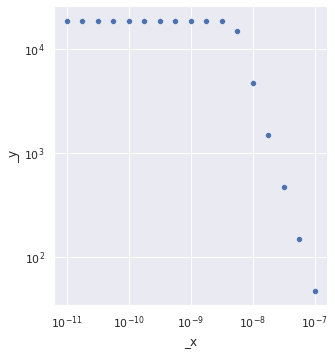

In [18]:
g = sns.relplot(x=r_m, y=d_Gy)
g.set(xscale='log');
g.set(yscale='log');